In [12]:
import numpy as np
import pandas as pd
from datetime import datetime,date,timedelta
df_benchmark=pd.read_csv('Benchmark_Index.csv',index_col=0)
df_activefunds=pd.read_csv('Target_Active_Funds.csv',index_col=0)

In [13]:
#First of all, we preprocess the data. We intercept the data from 2004-12-31 to 2016-12-31. Then we proportionally adjust the value of all
#indexes and funds on 2004-12-31 to 1.
df_benchmark=df_benchmark[df_benchmark.index<'2017-01-01']
df_benchmark=df_benchmark/df_benchmark.ix[0]
df_activefunds=df_activefunds[df_activefunds.index<'2017-01-01']
df_activefunds=df_activefunds/df_activefunds.ix[0]
benchmark_list=df_benchmark.columns.tolist()
activefunds_list=df_activefunds.columns.tolist()

In [14]:
df_benchmark.head()

,000300.SH,399905.SZ,000852.SH,H11009.CSI
2004-12-31,1.000000,1.000000,1.000000,1.000000
2005-01-04,0.982794,0.986927,0.989984,1.000498
2005-01-05,0.992564,1.003633,1.013583,1.001694
2005-01-06,0.983174,0.994595,1.005465,1.002789
2005-01-07,0.983958,0.997606,1.011740,1.002989


In [15]:
df_activefunds.head()

,020001.OF,090001.OF,121002.OF,100020.OF,160603.OF,161605.OF,233001.OF,288001.OF
2004-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2005-01-04,0.987109,0.986449,0.990099,0.988873,0.988330,0.989573,0.982548,0.986461
2005-01-05,0.988029,0.989226,0.992838,0.993965,0.991921,0.991469,0.985439,0.988153
2005-01-06,0.981584,0.984850,0.990415,0.989156,0.988330,0.982938,0.975482,0.980326
2005-01-07,0.978821,0.982493,0.991258,0.989628,0.988330,0.981991,0.969486,0.979585


In [16]:
df_benchmark.tail()

,000300.SH,399905.SZ,000852.SH,H11009.CSI
2016-12-26,3.322401,6.294755,8.547097,1.661877
2016-12-27,3.316385,6.288859,8.555990,1.662334
2016-12-28,3.301889,6.270239,8.521375,1.662452
2016-12-29,3.297765,6.252608,8.488297,1.664362
2016-12-30,3.310081,6.263626,8.490861,1.667517


In [17]:
df_activefunds.tail()

,020001.OF,090001.OF,121002.OF,100020.OF,160603.OF,161605.OF,233001.OF,288001.OF
2016-12-26,4.302947,3.316640,3.423425,4.100613,3.386894,2.680569,2.581692,3.562513
2016-12-27,4.302026,3.317398,3.424689,4.097124,3.391382,2.681517,2.581799,3.564629
2016-12-28,4.302947,3.318239,3.421635,4.092598,3.386894,2.680569,2.580300,3.562513
2016-12-29,4.299263,3.323289,3.418791,4.089769,3.391382,2.680569,2.581906,3.560398
2016-12-30,4.302947,3.330696,3.420897,4.094955,3.394075,2.680569,2.587473,3.562513


In [18]:
#We will create a scatterplot matrix that allows us to visualize the pair-wise
#correlations between the different features in this dataset in one place.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
sns.pairplot(df_benchmark[benchmark_list],size=2.5)
plt.show()

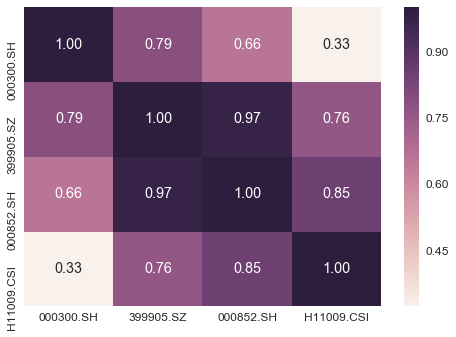

In [19]:
# In the following code example, we will use NumPy's corrcoef function on the five
# feature columns that we previously visualized in the scatterplot matrix, and we will
# use seaborn's heatmap function to plot the correlation matrix array as a heat map:
cm=np.corrcoef(df_benchmark.values.T)
sns.set(font_scale=1.2)
cols=df_benchmark.columns.tolist()
hm=sns.heatmap(cm,cbar=True,annot=True,fmt='.2f',yticklabels=cols,xticklabels=cols)
plt.show()

In [20]:
#Now we du principle component analysis on each funds and calculate the explained variance ratio 
# corresponding to the number of components.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
date_list=['2004-12-31','2005-06-30','2005-12-31','2006-06-30','2006-12-31','2007-06-30','2007-12-31',\
           '2008-06-30','2008-12-31','2009-06-30','2009-12-31','2010-06-30','2010-12-31','2011-06-30',\
           '2011-12-31','2012-06-30','2012-12-31','2013-06-30','2013-12-31','2014-06-30','2014-12-31',\
           '2015-06-30','2015-12-31','2016-06-30','2016-12-31']
slr=LinearRegression(fit_intercept=False)
X=df_benchmark
X1=X[(X.index<='2015-12-31')&(X.index>'2004-12-31')]-1
for f in range(len(activefunds_list)):
    print(activefunds_list[f]+': ')
    y=df_activefunds[activefunds_list[f]]
    y1=y[(y.index<='2015-12-31')&(y.index>'2004-12-31')]-1
    X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=0)
    for i in range(0,4):
        pca=PCA(n_components=i+1)
        X1_train_pca=pca.fit_transform(X1_train)
        X1_test_pca=pca.transform(X1_test)
        slr.fit(X1_train_pca,y1_train)
        print('n_components: %d, train_coef: '%(i+1),end='')
        print([float('%.3f' % coef) for coef in slr.coef_],end=', ')
        slr.fit(X1_test_pca,y1_test)
        print('test_coef: ',end='')
        print([float('%.3f' % coef) for coef in slr.coef_],end=', ')
        print("Explained Variance ratio: ",end='')
        print([float('%.3f' % ratio) for ratio in pca.explained_variance_ratio_],end=', ')
        pipe_slr=Pipeline([('pca',pca),('slr',slr)])
        pipe_slr.fit(X1_train,y1_train)
        print('PCA score: [%.3f]'%(pipe_slr.score(X1_test,y1_test)),end=', ')
        scores=cross_val_score(estimator=pipe_slr,X=X1_train,y=y1_train,cv=10,n_jobs=1)
        print('CV accuracy scores: ',end='')
        print([float('%.3f' % score) for score in scores],end=', ')
        print('CV acccuracy: [%.3f +/- %.3f]' % (np.mean(scores),np.std(scores)))

020001.OF: 
n_components: 1, train_coef: [0.268], test_coef: [0.273], Explained Variance ratio: [0.942], PCA score: [-4.425], CV accuracy scores: [-4.739, -3.689, -3.861, -3.957, -3.691, -4.038, -3.825, -4.767, -4.997, -4.807], CV acccuracy: [-4.237 +/- 0.496]
n_components: 2, train_coef: [0.268, 0.293], test_coef: [0.273, 0.336], Explained Variance ratio: [0.942, 0.056], PCA score: [-4.352], 

CV accuracy scores: [-4.589, -3.745, -3.852, -3.907, -3.661, -4.01, -3.849, -4.472, -4.901, -4.844], CV acccuracy: [-4.183 +/- 0.446]
n_components: 3, train_coef: [0.268, 0.293, -1.29], test_coef: [0.273, 0.332, 0.155], Explained Variance ratio: [0.942, 0.056, 0.002], PCA score: [-4.385], CV accuracy scores: [-4.517, -3.715, -3.83, -3.961, -3.618, -3.958, -3.856, -4.49, -4.758, -4.857], CV acccuracy: [-4.156 +/- 0.431]
n_components: 4, train_coef: [0.268, 0.293, -1.29, -5.086], test_coef: [0.261, 0.334, 0.126, -7.792], Explained Variance ratio: [0.942, 0.056, 0.002, 0.001], PCA score: [-4.044], 

CV accuracy scores: [-4.275, -3.637, -3.743, -3.855, -3.646, -3.906, -3.621, -4.389, -4.57, -4.273], CV acccuracy: [-3.992 +/- 0.335]
090001.OF: 
n_components: 1, train_coef: [0.177], test_coef: [0.18], Explained Variance ratio: [0.942], PCA score: [-5.041], CV accuracy scores: [-5.494, -4.145, -4.294, -4.62, -4.199, -4.69, -4.306, -5.383, -5.771, -5.351], CV acccuracy: [-4.825 +/- 0.583]
n_components: 2, train_coef: [0.177, 0.254], test_coef: [0.18, 0.275], Explained Variance ratio: [0.942, 0.056], PCA score: [-4.936], 

CV accuracy scores: [-5.282, -4.2, -4.266, -4.538, -4.151, -4.644, -4.325, -4.995, -5.623, -5.383], CV acccuracy: [-4.741 +/- 0.514]
n_components: 3, train_coef: [0.177, 0.254, -1.189], test_coef: [0.18, 0.279, -0.18], Explained Variance ratio: [0.942, 0.056, 0.002], PCA score: [-4.970], CV accuracy scores: [-5.165, -4.15, -4.226, -4.61, -4.083, -4.555, -4.323, -5.0, -5.409, -5.398], CV acccuracy: [-4.692 +/- 0.487]
n_components: 4, train_coef: [0.177, 0.254, -1.189, -3.371], test_coef: [0.172, 0.28, -0.2, -5.317], Explained Variance ratio: [0.942, 0.056, 0.002, 0.001], PCA score: [-4.637], CV accuracy scores: [-4.933, -4.08, -4.152, -4.518, -4.122, -4.518, -4.1, -4.906, -5.238, -4.823], CV acccuracy: [-4.539 +/- 0.398]
121002.OF: 
n_components: 1, train_coef: [0.196], test_coef: [0.201], Explained Variance ratio: [0.942], PCA score: [-5.109], 

CV accuracy scores: [-5.648, -4.246, -4.45, -4.776, -4.341, -4.772, -4.351, -5.643, -5.797, -5.401], CV acccuracy: [-4.942 +/- 0.585]
n_components: 2, train_coef: [0.196, 0.213], test_coef: [0.201, 0.24], Explained Variance ratio: [0.942, 0.056], PCA score: [-5.041], CV accuracy scores: [-5.492, -4.303, -4.444, -4.722, -4.314, -4.748, -4.379, -5.343, -5.694, -5.441], CV acccuracy: [-4.888 +/- 0.520]
n_components: 3, train_coef: [0.196, 0.213, -1.16], test_coef: [0.201, 0.242, -0.075], Explained Variance ratio: [0.942, 0.056, 0.002], PCA score: [-5.076], CV accuracy scores: [-5.391, -4.262, -4.413, -4.788, -4.255, -4.675, -4.382, -5.351, -5.505, -5.454], CV acccuracy: [-4.848 +/- 0.498]
n_components: 4, train_coef: [0.196, 0.213, -1.16, -3.682], test_coef: [0.192, 0.243, -0.097, -5.78], Explained Variance ratio: [0.942, 0.056, 0.002, 0.001], PCA score: [-4.735], 

CV accuracy scores: [-5.152, -4.191, -4.33, -4.7, -4.296, -4.637, -4.15, -5.253, -5.33, -4.862], CV acccuracy: [-4.690 +/- 0.424]
100020.OF: 
n_components: 1, train_coef: [0.249], test_coef: [0.253], Explained Variance ratio: [0.942], PCA score: [-5.430], CV accuracy scores: [-5.78, -4.457, -4.763, -4.941, -4.608, -5.049, -4.679, -5.97, -6.246, -5.843], CV acccuracy: [-5.234 +/- 0.623]
n_components: 2, train_coef: [0.249, 0.291], test_coef: [0.253, 0.323], Explained Variance ratio: [0.942, 0.056], PCA score: [-5.356], CV accuracy scores: [-5.618, -4.515, -4.751, -4.884, -4.577, -5.028, -4.709, -5.643, -6.136, -5.881], CV acccuracy: [-5.174 +/- 0.560]
n_components: 3, train_coef: [0.249, 0.291, -1.545], test_coef: [0.253, 0.325, -0.111], Explained Variance ratio: [0.942, 0.056, 0.002], PCA score: [-5.393], 

CV accuracy scores: [-5.517, -4.47, -4.717, -4.954, -4.514, -4.948, -4.712, -5.652, -5.937, -5.893], CV acccuracy: [-5.131 +/- 0.537]
n_components: 4, train_coef: [0.249, 0.291, -1.545, -4.878], test_coef: [0.241, 0.326, -0.14, -7.761], Explained Variance ratio: [0.942, 0.056, 0.002, 0.001], PCA score: [-5.028], CV accuracy scores: [-5.268, -4.395, -4.638, -4.852, -4.556, -4.912, -4.477, -5.548, -5.747, -5.265], CV acccuracy: [-4.966 +/- 0.446]
160603.OF: 
n_components: 1, train_coef: [0.19], test_coef: [0.193], Explained Variance ratio: [0.942], PCA score: [-4.971], CV accuracy scores: [-5.368, -4.084, -4.308, -4.51, -4.205, -4.559, -4.195, -5.511, -5.631, -5.275], CV acccuracy: [-4.765 +/- 0.579]
n_components: 2, train_coef: [0.19, 0.225], test_coef: [0.193, 0.253], Explained Variance ratio: [0.942, 0.056], PCA score: [-4.888], 

CV accuracy scores: [-5.198, -4.14, -4.293, -4.45, -4.17, -4.529, -4.221, -5.178, -5.519, -5.309], CV acccuracy: [-4.701 +/- 0.510]
n_components: 3, train_coef: [0.19, 0.225, -1.122], test_coef: [0.193, 0.255, -0.06], Explained Variance ratio: [0.942, 0.056, 0.002], PCA score: [-4.925], CV accuracy scores: [-5.099, -4.097, -4.259, -4.517, -4.112, -4.456, -4.222, -5.191, -5.329, -5.322], CV acccuracy: [-4.660 +/- 0.489]
n_components: 4, train_coef: [0.19, 0.225, -1.122, -3.406], test_coef: [0.184, 0.255, -0.081, -5.428], Explained Variance ratio: [0.942, 0.056, 0.002, 0.001], PCA score: [-4.603], CV accuracy scores: [-4.875, -4.033, -4.191, -4.43, -4.154, -4.423, -4.013, -5.101, -5.165, -4.764], CV acccuracy: [-4.515 +/- 0.411]
161605.OF: 
n_components: 1, train_coef: [0.145], test_coef: [0.149], Explained Variance ratio: [0.942], PCA score: [-4.307], 

CV accuracy scores: [-4.923, -3.545, -3.926, -4.043, -3.9, -3.97, -3.621, -4.725, -5.015, -4.543], CV acccuracy: [-4.221 +/- 0.508]
n_components: 2, train_coef: [0.145, 0.253], test_coef: [0.149, 0.284], Explained Variance ratio: [0.942, 0.056], PCA score: [-4.115], CV accuracy scores: [-4.609, -3.596, -3.865, -3.905, -3.82, -3.867, -3.605, -4.165, -4.799, -4.549], CV acccuracy: [-4.078 +/- 0.409]
n_components: 3, train_coef: [0.145, 0.253, -0.274], test_coef: [0.148, 0.274, 0.481], Explained Variance ratio: [0.942, 0.056, 0.002], PCA score: [-4.135], CV accuracy scores: [-4.586, -3.589, -3.862, -3.936, -3.81, -3.85, -3.614, -4.179, -4.743, -4.562], CV acccuracy: [-4.073 +/- 0.399]
n_components: 4, train_coef: [0.145, 0.253, -0.274, -1.687], test_coef: [0.144, 0.274, 0.469, -3.085], Explained Variance ratio: [0.942, 0.056, 0.002, 0.001], PCA score: [-3.957], 

CV accuracy scores: [-4.466, -3.574, -3.836, -3.913, -3.859, -3.859, -3.496, -4.154, -4.664, -4.225], CV acccuracy: [-4.005 +/- 0.352]
233001.OF: 
n_components: 1, train_coef: [0.127], test_coef: [0.129], Explained Variance ratio: [0.942], PCA score: [-3.752], CV accuracy scores: [-4.002, -3.315, -3.194, -3.678, -3.299, -3.495, -3.178, -3.828, -4.335, -4.034], CV acccuracy: [-3.636 +/- 0.382]
n_components: 2, train_coef: [0.127, 0.353], test_coef: [0.129, 0.373], Explained Variance ratio: [0.942, 0.056], PCA score: [-3.424], CV accuracy scores: [-3.515, -3.34, -3.012, -3.411, -3.117, -3.288, -3.091, -3.076, -3.964, -3.946], CV acccuracy: [-3.376 +/- 0.327]
n_components: 3, train_coef: [0.127, 0.353, -0.258], test_coef: [0.129, 0.365, 0.411], Explained Variance ratio: [0.942, 0.056, 0.002], PCA score: [-3.440], 

CV accuracy scores: [-3.497, -3.334, -3.008, -3.437, -3.108, -3.273, -3.098, -3.088, -3.918, -3.958], CV acccuracy: [-3.372 +/- 0.321]
n_components: 4, train_coef: [0.127, 0.353, -0.258, -1.78], test_coef: [0.124, 0.365, 0.4, -3.082], Explained Variance ratio: [0.942, 0.056, 0.002, 0.001], PCA score: [-3.260], CV accuracy scores: [-3.392, -3.305, -2.977, -3.403, -3.144, -3.264, -2.975, -3.055, -3.841, -3.626], CV acccuracy: [-3.298 +/- 0.267]
288001.OF: 
n_components: 1, train_coef: [0.259], test_coef: [0.265], Explained Variance ratio: [0.942], PCA score: [-3.938], CV accuracy scores: [-4.33, -3.331, -3.47, -3.538, -3.341, -3.59, -3.419, -4.305, -4.362, -4.38], CV acccuracy: [-3.807 +/- 0.446]
n_components: 2, train_coef: [0.259, 0.19], test_coef: [0.265, 0.231], Explained Variance ratio: [0.942, 0.056], PCA score: [-3.899], 

CV accuracy scores: [-4.243, -3.373, -3.476, -3.508, -3.328, -3.583, -3.445, -4.117, -4.306, -4.412], CV acccuracy: [-3.779 +/- 0.411]
n_components: 3, train_coef: [0.259, 0.19, -1.336], test_coef: [0.265, 0.232, -0.062], Explained Variance ratio: [0.942, 0.056, 0.002], PCA score: [-3.930], CV accuracy scores: [-4.164, -3.338, -3.449, -3.553, -3.277, -3.526, -3.449, -4.128, -4.156, -4.414], CV acccuracy: [-3.745 +/- 0.398]
n_components: 4, train_coef: [0.259, 0.19, -1.336, -4.494], test_coef: [0.254, 0.233, -0.088, -6.826], Explained Variance ratio: [0.942, 0.056, 0.002, 0.001], PCA score: [-3.624], CV accuracy scores: [-3.949, -3.266, -3.367, -3.472, -3.304, -3.479, -3.231, -4.031, -3.992, -3.875], CV acccuracy: [-3.597 +/- 0.309]


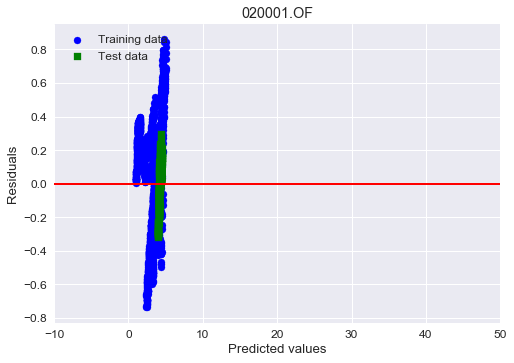

Mean test: 4.256, pred: 4.256
Std test: 0.076, pred: 0.134
Max test: 4.349, pred: 4.515
Min test: 4.051, pred: 3.973
MSE train: 0.075, pred: 0.016
R^2 train: 0.921, test: -1.761
Coefficients: [0.393, 0.819, -0.689, 4.974]
                pred      test
2016-12-26  4.341568  4.302947
2016-12-27  4.330518  4.302026
2016-12-28  4.334007  4.302947
2016-12-29  4.350243  4.299263
2016-12-30  4.378038  4.302947


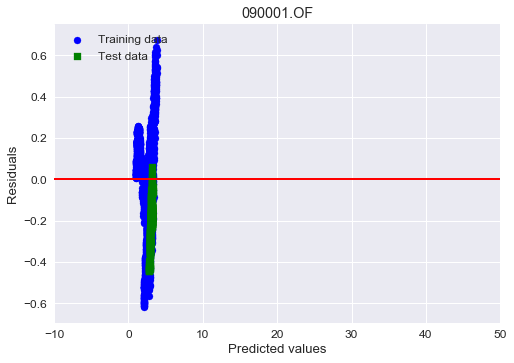

Mean test: 3.266, pred: 3.067
Std test: 0.059, pred: 0.105
Max test: 3.348, pred: 3.276
Min test: 3.125, pred: 2.807
MSE train: 0.044, pred: 0.049
R^2 train: 0.903, test: -13.199
Coefficients: [0.207, 0.854, -0.689, 3.543]
                pred      test
2016-12-26  3.141983  3.316640
2016-12-27  3.131193  3.317398
2016-12-28  3.136580  3.318239
2016-12-29  3.150249  3.323289
2016-12-30  3.171614  3.330696


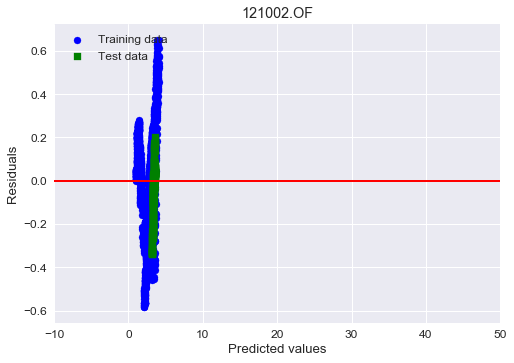

Mean test: 3.453, pred: 3.403
Std test: 0.056, pred: 0.109
Max test: 3.540, pred: 3.617
Min test: 3.302, pred: 3.145
MSE train: 0.044, pred: 0.017
R^2 train: 0.915, test: -4.260
Coefficients: [0.221, 0.831, -0.669, 3.951]
                pred      test
2016-12-26  3.476915  3.423425
2016-12-27  3.466540  3.424689
2016-12-28  3.471494  3.421635
2016-12-29  3.485622  3.418791
2016-12-30  3.508253  3.420897


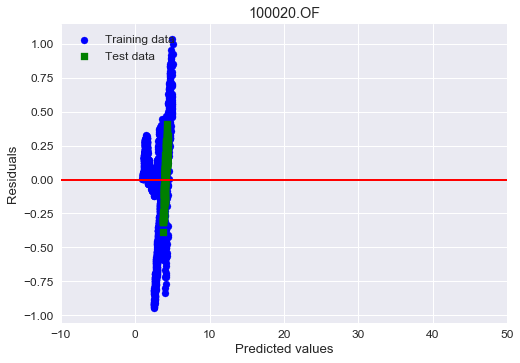

Mean test: 4.056, pred: 4.117
Std test: 0.064, pred: 0.147
Max test: 4.197, pred: 4.410
Min test: 3.876, pred: 3.766
MSE train: 0.090, pred: 0.026
R^2 train: 0.897, test: -5.362
Coefficients: [0.305, 1.117, -0.925, 5.401]
                pred      test
2016-12-26  4.216300  4.100613
2016-12-27  4.202123  4.097124
2016-12-28  4.209560  4.092598
2016-12-29  4.229522  4.089769
2016-12-30  4.260252  4.094955


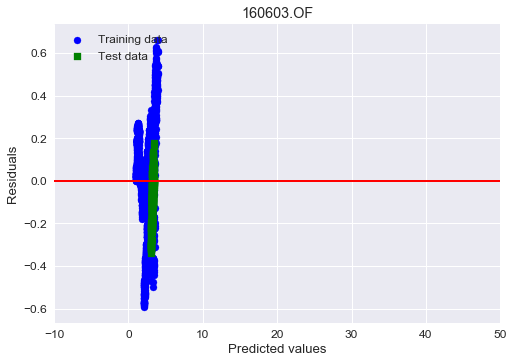

Mean test: 3.324, pred: 3.253
Std test: 0.058, pred: 0.104
Max test: 3.423, pred: 3.457
Min test: 3.172, pred: 3.006
MSE train: 0.042, pred: 0.015
R^2 train: 0.913, test: -3.614
Coefficients: [0.218, 0.803, -0.64, 3.627]
                pred      test
2016-12-26  3.325907  3.386894
2016-12-27  3.315834  3.391382
2016-12-28  3.320312  3.386894
2016-12-29  3.333360  3.391382
2016-12-30  3.354685  3.394075


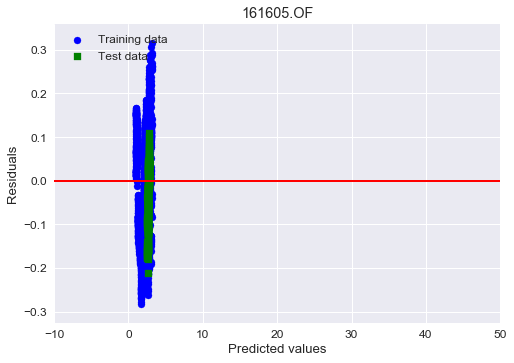

Mean test: 2.705, pred: 2.672
Std test: 0.037, pred: 0.069
Max test: 2.849, pred: 2.832
Min test: 2.607, pred: 2.552
MSE train: 0.012, pred: 0.006
R^2 train: 0.955, test: -3.353
Coefficients: [0.355, 0.239, -0.217, 1.908]
                pred      test
2016-12-26  2.717923  2.680569
2016-12-27  2.713318  2.681517
2016-12-28  2.711445  2.680569
2016-12-29  2.716580  2.680569
2016-12-30  2.729054  2.680569


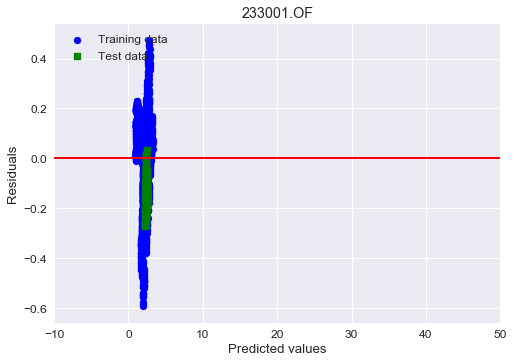

Mean test: 2.533, pred: 2.397
Std test: 0.075, pred: 0.062
Max test: 2.641, pred: 2.552
Min test: 2.367, pred: 2.278
MSE train: 0.028, pred: 0.022
R^2 train: 0.895, test: -2.973
Coefficients: [0.435, 0.201, -0.238, 1.765]
                pred      test
2016-12-26  2.445431  2.581692
2016-12-27  2.440320  2.581799
2016-12-28  2.438726  2.580300
2016-12-29  2.444638  2.581906
2016-12-30  2.457165  2.587473


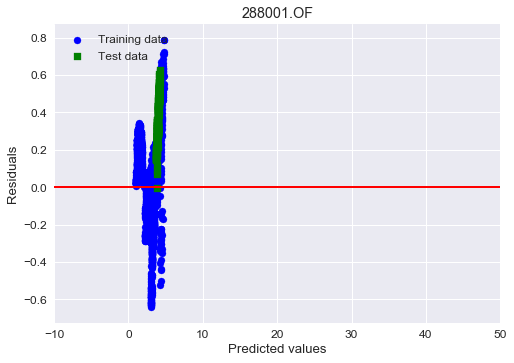

Mean test: 3.609, pred: 3.987
Std test: 0.039, pred: 0.122
Max test: 3.842, pred: 4.213
Min test: 3.548, pred: 3.724
MSE train: 0.048, pred: 0.158
R^2 train: 0.942, test: -101.501
Coefficients: [0.213, 0.866, -0.638, 4.23]
                pred      test
2016-12-26  4.064740  3.562513
2016-12-27  4.054612  3.564629
2016-12-28  4.057983  3.562513
2016-12-29  4.071020  3.560398
2016-12-30  4.094895  3.562513


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X1_train=X[(X.index<='2015-12-31')&(X.index>'2004-12-31')]-1
X1_test=X[(X.index<='2016-12-31')&(X.index>'2015-12-31')]-1
for i in range(len(activefunds_list)):
    y=df_activefunds[activefunds_list[i]]
    y1_train=y[(y.index<='2015-12-31')&(y.index>'2004-12-31')]-1
    y1_test=y[(y.index<='2016-12-31')&(y.index>'2015-12-31')]-1
    slr.fit(X1_train,y1_train)
    y1_train_pred=slr.predict(X1_train)
    y1_test_pred=slr.predict(X1_test)
    y_train=y1_train+1
    y_train_pred=y1_train_pred+1
    y_test=y1_test+1
    y_test_pred=y1_test_pred+1
    plt.scatter(y_train_pred,y_train_pred-y_train,c='b',marker='o',label='Training data')
    plt.scatter(y_test_pred,y_test_pred-y_test,c='g',marker='s',label='Test data')
    plt.title(activefunds_list[i])
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
    plt.xlim([-10,50])
    plt.show()
    print('Mean test: %.3f, pred: %.3f'%(y_test.mean(),y_test_pred.mean()))
    print('Std test: %.3f, pred: %.3f'%(y_test.std(),y_test_pred.std()))
    print('Max test: %.3f, pred: %.3f'%(y_test.max(),y_test_pred.max()))
    print('Min test: %.3f, pred: %.3f'%(y_test.min(),y_test_pred.min()))
    print('MSE train: %.3f, pred: %.3F'%(mean_squared_error(y_train,y_train_pred),\
          mean_squared_error(y_test,y_test_pred)))
    print('R^2 train: %.3f, test: %.3f'%(r2_score(y_train,y_train_pred),\
                                         r2_score(y_test,y_test_pred)))
    print('Coefficients: ',end='')
    print([float('%.3f' % coef) for coef in slr.coef_])
    print(pd.DataFrame(data={'test':y_test,'pred':y_test_pred}).tail())